Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.
Этапы работы:

1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

3. Используйте статистические методы для отбора признаков:
a) Выберите признаки на основе матрицы корреляции.
b) Отсеките низковариативные признаки (VarianceThreshold).
c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

4. Осуществите отбор признаков на основе дисперсионного анализа:
a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
b) Повторите п. 2 на отобранных признаках.

5. Отбор с использованием моделей:
a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6. Перебор признаков:
a) SequentialFeatureSelector.
b) Повторите п. 2 на отобранных признаках.

7. Сформулируйте выводы по проделанной работе:
a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [341]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [342]:
x_data_generated, y_data_generated = make_classification(scale=1)

In [343]:
x_data_generated

array([[-1.91108575,  1.6496614 , -3.04802478, ..., -2.1107734 ,
         0.24963978,  0.06788587],
       [ 1.30047249, -0.7347504 ,  0.02460229, ..., -0.32107747,
        -0.50647505, -2.68509931],
       [-0.42878885, -0.49473497,  0.21563708, ...,  0.09219826,
        -0.62274833,  0.62026174],
       ...,
       [-0.88736529,  0.24997205,  0.99857387, ..., -1.30026052,
         0.69147672, -0.00743846],
       [ 0.13135459,  1.84793154, -0.65335504, ..., -1.94055359,
         1.0814599 , -0.93583902],
       [-0.53622835, -0.15774086,  0.92853588, ...,  2.59451729,
         1.04109953, -0.23364047]])

In [344]:
y_data_generated

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [345]:
model = LogisticRegression(random_state=34)

In [346]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, y_data_generated, test_size=0.2, random_state=42)

In [347]:
model.fit(X_train, y_train)

LogisticRegression(random_state=34)

In [348]:
model.score(X_test, y_test)

1.0

In [349]:
cross_val = cross_val_score(LogisticRegression(random_state=34), X_test, y_test, scoring='accuracy').mean()
cross_val

0.95

In [350]:
x_data = pd.DataFrame(x_data_generated)
y_data = pd.DataFrame(y_data_generated)
data = pd.concat([x_data, y_data], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,0
0,-1.911086,1.649661,-3.048025,-1.745785,-2.181005,1.298629,2.060359,0.085028,2.420345,-1.504251,...,-0.258766,-0.305027,-0.650311,0.201323,-0.800231,0.222830,-2.110773,0.249640,0.067886,0
1,1.300472,-0.734750,0.024602,-0.998914,-1.033147,1.987609,1.492488,-0.414866,-2.202376,1.545987,...,-0.605824,-0.163025,1.128337,-1.615107,-1.298175,0.308821,-0.321077,-0.506475,-2.685099,0
2,-0.428789,-0.494735,0.215637,1.229738,1.472370,-1.268011,0.375191,-1.236522,-0.608987,0.505459,...,1.010747,0.211437,0.011442,0.335100,-0.659143,-0.681285,0.092198,-0.622748,0.620262,1
3,1.327894,1.515730,0.803958,-2.157176,-2.404140,0.178533,-1.032891,0.534914,-0.375849,-1.875640,...,-0.701535,-0.361327,1.227921,0.204999,-1.632320,0.678583,0.669304,0.190022,-0.161133,0
4,0.376621,-1.084501,0.202238,-1.298858,-1.179659,-0.223454,0.367201,-0.474196,-1.155120,-0.494955,...,0.175002,-0.203206,2.610748,-0.415331,0.742845,-1.404985,-0.548955,0.049915,0.757571,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.692218,-0.347248,1.133796,-0.231807,-0.087531,-1.281330,2.413241,-0.607364,0.067321,0.813115,...,1.808440,-0.029677,1.325178,-0.476315,0.781099,0.151742,-1.128965,-0.567045,0.503975,0
96,2.861164,1.336644,0.082205,-0.998136,-1.025767,-0.250832,0.742735,-1.013903,0.279839,0.324777,...,0.603989,-0.162546,1.173387,-0.622501,-0.157351,0.208212,1.036742,-0.683042,-1.578306,0
97,-0.887365,0.249972,0.998574,-0.875785,-1.273956,-1.155479,-0.954848,0.747342,1.159294,-2.122691,...,-0.795879,-0.162654,-1.582504,0.270549,0.750097,0.258412,-1.300261,0.691477,-0.007438,0
98,0.131355,1.847932,-0.653355,1.203945,1.581683,-0.157710,0.191089,-0.786749,-0.250968,-0.163685,...,-0.030304,0.214513,0.990530,-1.082521,0.170816,-0.710424,-1.940554,1.081460,-0.935839,1


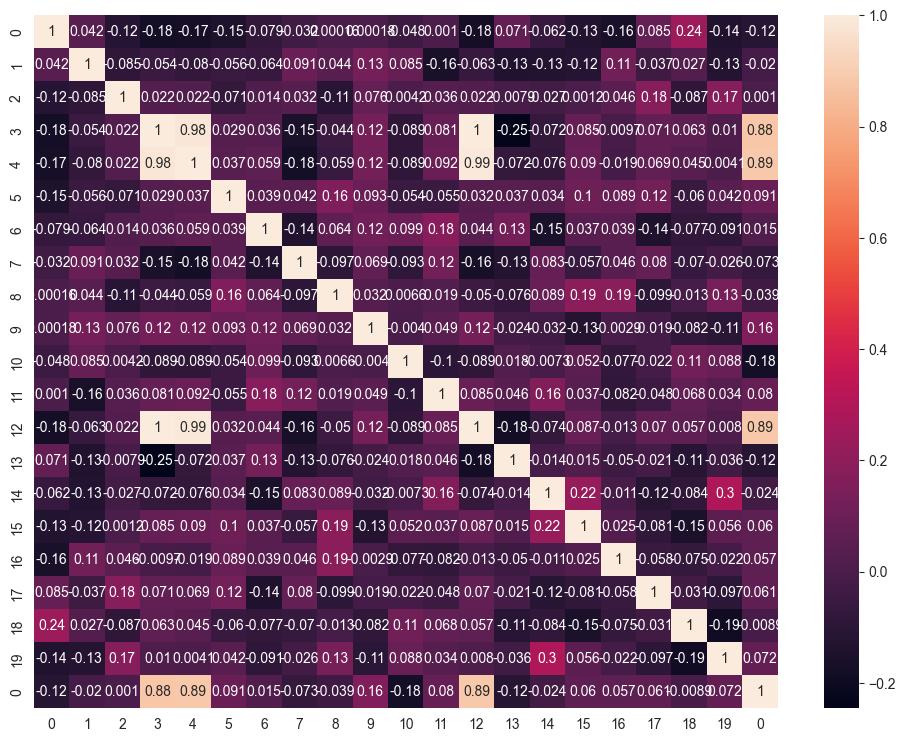

In [351]:
corr = data.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)
plt.show()

In [352]:
sel = VarianceThreshold(threshold=0.15)
X_tr = sel.fit_transform(X_train)
X_t = sel.transform(X_test)
X_tr.shape

(80, 19)

In [353]:
th_hold = LogisticRegression(random_state=34).fit(X_tr, y_train)
th_hold_score = th_hold.score(X_t, y_test)
th_hold_score

1.0

In [354]:
cross_val_th = cross_val_score(LogisticRegression(random_state=34), X_t, y_test, scoring='accuracy').mean()
cross_val_th

0.95

In [355]:
selector = SelectKBest(f_classif, k=5)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(80, 5)

In [356]:
KBeast = LogisticRegression(random_state=34).fit(X_tr, y_train)
Kbeast_score = KBeast.score(X_t, y_test)
Kbeast_score

0.95

In [357]:
cross_val_kb = cross_val_score(LogisticRegression(random_state=34), X_t, y_test, scoring='accuracy').mean()
cross_val_kb

0.95

In [358]:
selector = SelectFromModel(LogisticRegression(random_state=34), prefit=False, max_features=5, threshold=-np.inf)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(80, 5)

In [359]:
sel_reg = LogisticRegression(penalty='l1', random_state=34, solver='liblinear').fit(X_tr, y_train)
sel_reg_score = sel_reg.score(X_t, y_test)
sel_reg_score

0.95

In [360]:
cross_val_sel = cross_val_score(LogisticRegression(random_state=34), X_t, y_test, scoring='accuracy').mean()
cross_val_sel

0.95

In [361]:
selector = SelectFromModel(RandomForestClassifier(random_state=34), prefit=False, max_features=5, threshold=-np.inf)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(80, 5)

In [362]:
forest = RandomForestClassifier(random_state=34).fit(X_tr, y_train)
forest_score = sel_reg.score(X_t, y_test)
forest_score

0.95

In [363]:
cross_val_f = cross_val_score(RandomForestClassifier(random_state=34), X_t, y_test, scoring='accuracy').mean()
cross_val_f

0.9

In [364]:
importances = forest.feature_importances_
importances

array([0.38311068, 0.24505491, 0.02181954, 0.32032126, 0.02969362])

In [365]:
sfs_backward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=34), n_features_to_select=5, direction="backward"
)
sfs_backward.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=RandomForestClassifier(random_state=34),
                          n_features_to_select=5)

In [366]:
X_tr = sfs_backward.transform(X_train)
X_t = sfs_backward.transform(X_test)

X_tr.shape

(80, 5)

In [367]:
rf = RandomForestClassifier(random_state=34).fit(X_tr, y_train)
rf.score(X_t, y_test)

0.95

In [368]:
cross_val_rf = cross_val_score(RandomForestClassifier(random_state=34), X_t, y_test, scoring='accuracy').mean()
cross_val_rf

0.85

In [369]:
result = pd.DataFrame()
result['Способ выбора признаков'] = ['LogisticRegression()', 'VarianceThreshold', 'SelectKBest', 'SelectFromModel', 'RandomForest', 'SequentialFeatureSelector']
result['Количество признаков'] = [20, 20, 5, 5, 5, 5]
result['Средняя точность модели'] = [cross_val, cross_val_th, cross_val_kb, cross_val_sel, cross_val_f, cross_val_rf]
result

,Способ выбора признаков,Количество признаков,Средняя точность модели
0,LogisticRegression(),20,0.95
1,VarianceThreshold,20,0.95
2,SelectKBest,5,0.95
3,SelectFromModel,5,0.95
4,RandomForest,5,0.90
5,SequentialFeatureSelector,5,0.85


Все модели справились отлично, даже со значительным изменением количества признаков, разве что модели, которые использовали дерево решений, показали метрику хуже, это связано с сильной зависимостью от трёх переменных с показателем выше 0.88 и скорее всего, модели на основе дерева решений переобучились, с чем и связано ухудшение показателей. Если запустить код повторно и сгенерировать другие данные, все может кардинально поменяться. 